# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Get today's date - for use when titling charts.
today_date = datetime.today()
formatted_date = today_date.strftime("%m/%d/%Y")


# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "albany"
city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
city_weather = requests.get(city_url).json()

print(json.dumps(city_weather, indent =4))


# print(city_weather["coord"]["lon"])
# print(city_weather["main"]["temp_max"])
# print(city_weather["main"]["humidity"])
# print(city_weather["clouds"]["all"])
# print(city_weather["wind"]["speed"])
# print(city_weather["sys"]["country"])
# print(city_weather["dt"])

{
    "coord": {
        "lon": -73.9662,
        "lat": 42.6001
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 38.75,
        "feels_like": 34.99,
        "temp_min": 36.34,
        "temp_max": 41.09,
        "pressure": 1013,
        "humidity": 84
    },
    "visibility": 2785,
    "wind": {
        "speed": 5.01,
        "deg": 183,
        "gust": 8.01
    },
    "clouds": {
        "all": 100
    },
    "dt": 1706291581,
    "sys": {
        "type": 2,
        "id": 19530,
        "country": "US",
        "sunrise": 1706271369,
        "sunset": 1706306412
    },
    "timezone": -18000,
    "id": 5106841,
    "name": "Albany",
    "cod": 200
}


In [16]:
print(cities)

['grytviken', 'irymple', 'tchintabaraden', 'odienne', 'isafjordur', 'mersing', 'saudarkrokur', 'tonj', 'zhetybay', 'lisala', 'tiksi', 'thompson', 'hadibu', 'kalmunai', 'tura', 'yantarnyy', 'invercargill', 'camargo', 'bredasdorp', 'taiohae', 'manacapuru', 'geraldton', 'beyneu', 'whitehorse', 'port-aux-francais', 'pandan', 'adamstown', 'pendleton', 'olonkinbyen', 'akureyri', 'hyesan', 'new norfolk', 'waitangi', 'labrador city', 'agat village', 'rodolfo sanchez taboada', 'olyokminsk', 'papatowai', 'wailua homesteads', 'imbituba', 'chibuto', 'tazovsky', 'bilibino', 'edinburgh of the seven seas', 'bel ombre', 'kapuskasing', 'marsh harbour', 'albany', 'kaspiyskiy', "nar'yan-mar", 'inhambane', 'russkaya polyana', 'massaguet', 'east london', 'laojunmiao', 'tazacorte', 'pindi gheb', 'san borja', 'codrington', 'jayapura', 'tarashcha', 'puerto natales', 'selfoss', 'jamestown', 'san jose de guanipa', 'howard springs', 'ad dabbah', 'suluru', 'bangkalan', 'iqaluit', 'puerto santa', 'myitkyina', 'ush

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping..." + city_url)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=grytviken
Processing Record 2 of Set 1 | irymple
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=irymple
Processing Record 3 of Set 1 | tchintabaraden
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=tchintabaraden
Processing Record 4 of Set 1 | odienne
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=odienne
Processing Record 5 of Set 1 | isafjordur
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=isafjordur
Processing Record 6 of Set 1 | mersing
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd1364855c87bc69e06e25cd6&q=mersing
Processing Record 7 of Set 1 | saudarkrokur
http://api.openweathermap.org/data/2.5/weather?appid=8254348dd

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,278.83,76,83,0.53,GS,1706288835
1,irymple,-34.2500,142.1667,288.76,67,100,6.03,AU,1706288957
2,tchintabaraden,15.8969,5.7985,296.84,17,0,5.82,NE,1706288957
3,odienne,9.5100,-7.5692,308.29,8,0,2.77,CI,1706288957
4,isafjordur,66.0755,-23.1240,271.17,69,75,11.32,IS,1706288840


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,278.83,76,83,0.53,GS,1706288835
1,irymple,-34.2500,142.1667,288.76,67,100,6.03,AU,1706288957
2,tchintabaraden,15.8969,5.7985,296.84,17,0,5.82,NE,1706288957
3,odienne,9.5100,-7.5692,308.29,8,0,2.77,CI,1706288957
4,isafjordur,66.0755,-23.1240,271.17,69,75,11.32,IS,1706288840


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

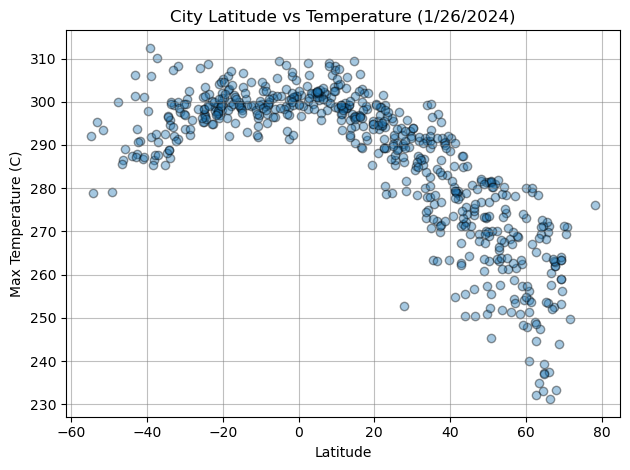

In [41]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"City Latitude vs Temperature ({formatted_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

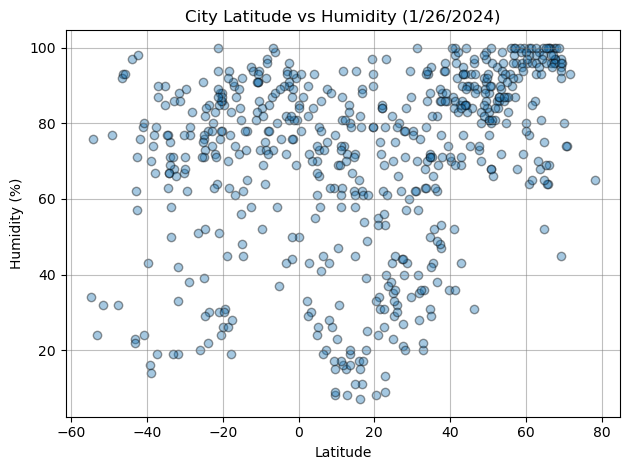

In [45]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"City Latitude vs Humidity ({formatted_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

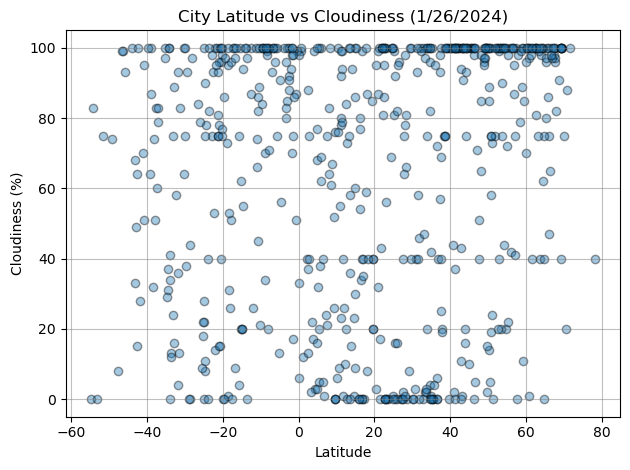

In [44]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"City Latitude vs Cloudiness ({formatted_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

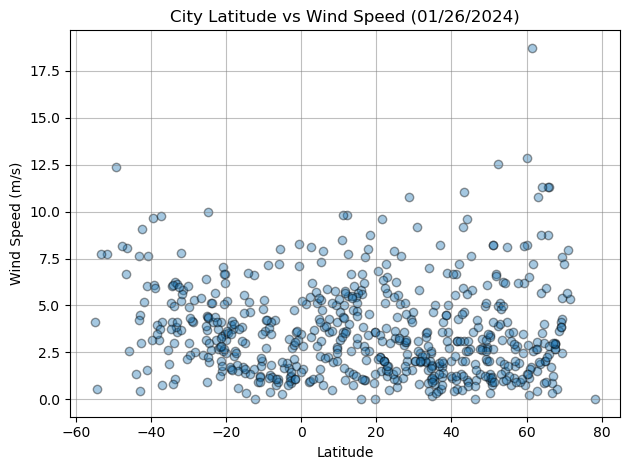

In [49]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"City Latitude vs Wind Speed ({formatted_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Define a function to create Linear Regression plots
def lin_regress_calc(xvalues, yvalues):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    
    annotation = f"y={slope.round(2)}x + {intercept.round(2)}"
    plt.plot(xvalues, regress_values, color="red")
    plt.annotate(annotation, xy=(0.05, 0.1), xycoords='axes fraction', color="red", fontsize=14)
    return rvalue





In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tchintabaraden,15.8969,5.7985,296.84,17,0,5.82,NE,1706288957
3,odienne,9.5100,-7.5692,308.29,8,0,2.77,CI,1706288957
4,isafjordur,66.0755,-23.1240,271.17,69,75,11.32,IS,1706288840
5,mersing,2.4312,103.8405,298.38,90,37,5.44,MY,1706288957
6,saudarkrokur,65.7461,-19.6394,269.77,64,86,11.31,IS,1706288634


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,278.83,76,83,0.53,GS,1706288835
1,irymple,-34.2500,142.1667,288.76,67,100,6.03,AU,1706288957
15,invercargill,-46.4000,168.3500,286.49,93,99,8.05,NZ,1706288830
17,bredasdorp,-34.5322,20.0403,296.79,63,31,5.14,ZA,1706288828
18,manacapuru,-3.2997,-60.6206,303.05,72,80,1.68,BR,1706288960


###  Temperature vs. Latitude Linear Regression Plot

R-Value:  -0.8601433856002443


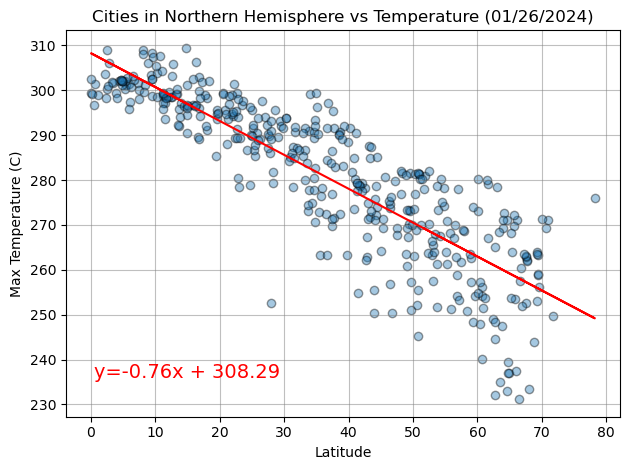

In [125]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)
rvalue = lin_regress_calc(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"Cities in Northern Hemisphere vs Temperature ({formatted_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
# print(rvalue)
print(f"R-Value:  {rvalue}")
plt.show()


R-Value:  0.46974989188336974


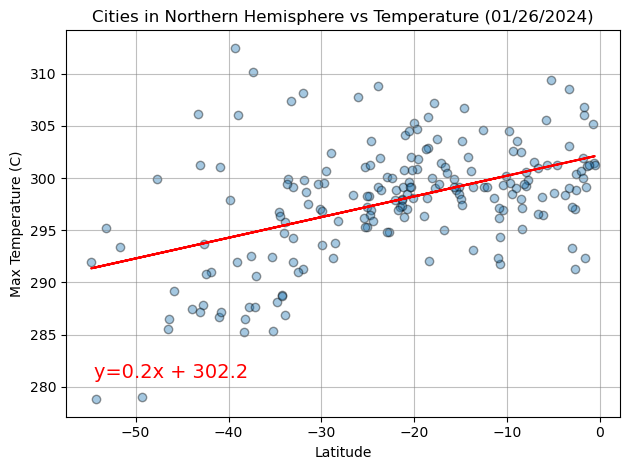

In [126]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

plt.scatter(x_axis, y_axis, edgecolors="black", alpha=.40)
rvalue = lin_regress_calc(x_axis, y_axis)

# Incorporate the other graph properties
plt.grid(color="grey", alpha=.5)
plt.title(f"Cities in Northern Hemisphere vs Temperature ({formatted_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
# print(rvalue)
print(f"R-Value:  {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE